<a href="https://colab.research.google.com/github/muhsupriazis/muhsupriazis/blob/main/clastering_weeks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
# Upload file Excel
from google.colab import files
uploaded = files.upload()

# Baca file Excel
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)


Saving Database.xlsx to Database.xlsx


In [3]:
# Pivot tabel untuk menghasilkan kolom traffic1, traffic2, traffic3, dst.
pivot_table = pd.pivot_table(
    df,
    values='traffic',
    index=['location_name', 'week'],
    columns=['day', 'hour'],
    aggfunc=np.sum,
    fill_value=0
)

# Mengubah multi-index columns menjadi single level
pivot_table.columns = [f"traffic_{day}_{hour}" for day, hour in pivot_table.columns]
pivot_table = pivot_table.reset_index()


<ipython-input-3-850261791914>:2: FutureWarning: The provided callable <function sum at 0x7f1fd3f22dd0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = pd.pivot_table(


In [4]:
# Simpan pivot table ke file Excel
output_file = '/content/pivot_table.xlsx'
pivot_table.to_excel(output_file, index=False)

# Download file
files.download(output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
# Load the pivot table data
file_name = '/content/pivot_table.xlsx'  # Ganti dengan nama file yang sesuai
pivot_df_day = pd.read_excel(file_name)

In [11]:
# Menyiapkan data untuk klasterisasi
# Mengambil kolom numeric untuk klasterisasi (misalnya traffic1, traffic2, dst.)
data_day = pivot_df_day.drop(columns=['location_name', 'week'])  # Drop non-numeric columns

# Normalisasi data
scaler = StandardScaler()
data_normalized_week = scaler.fit_transform(data_day)

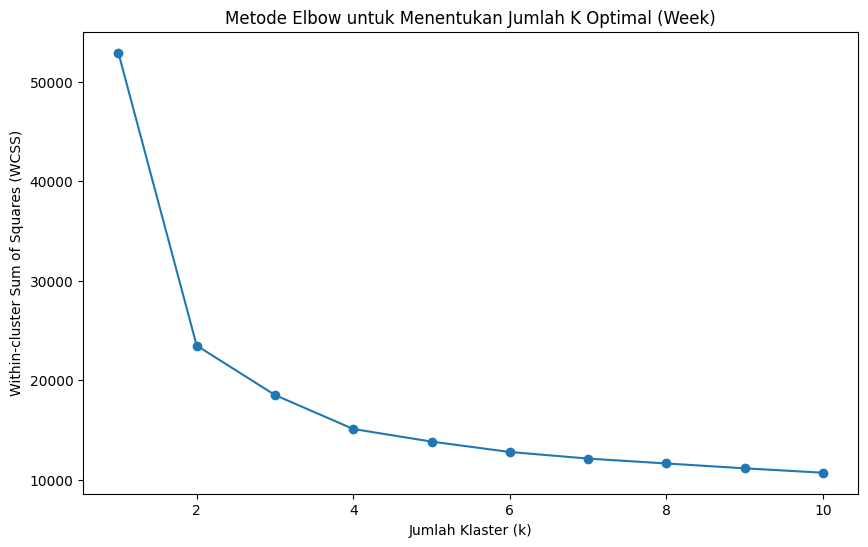

In [12]:
# Menentukan jumlah klaster yang optimal menggunakan metode elbow
wcss_week = []
for i in range(1, 11):  # Coba 1 sampai 10 klaster
    kmeans_week = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_week.fit(data_normalized_week)
    wcss_week.append(kmeans_week.inertia_)

# Plot hasil metode elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_week, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah K Optimal (Week)')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.show()

In [17]:
# Klasterisasi menggunakan K-Means dengan k yang optimal
k_day = 2  # Misalnya k yang optimal setelah metode elbow
kmeans_week = KMeans(n_clusters=k_day, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_week = kmeans_week.fit_predict(data_normalized_week)

# Menambahkan hasil klasterisasi ke DataFrame
pivot_df_day['Cluster'] = clusters_week

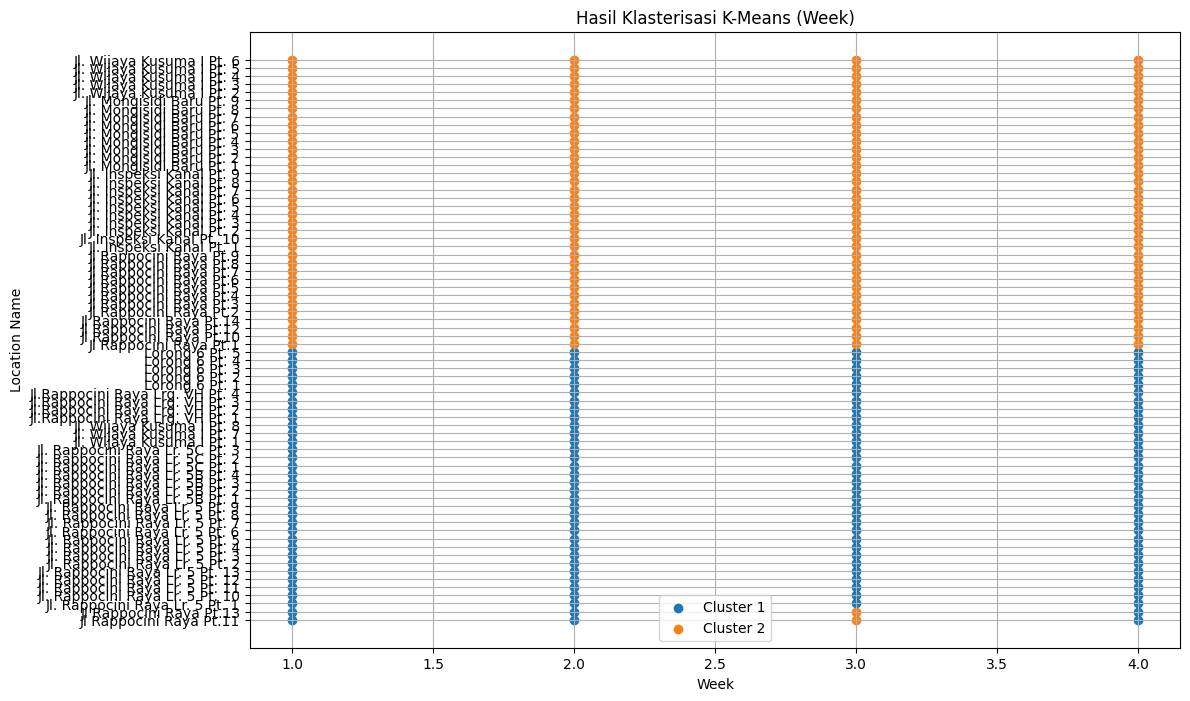

In [18]:
# Plot hasil klasterisasi
plt.figure(figsize=(12, 8))

# Warna berbeda untuk setiap klaster
for i in range(k_day):
    cluster_data_day = pivot_df_day[pivot_df_day['Cluster'] == i]
    plt.scatter(cluster_data_day['week'], cluster_data_day['location_name'], label=f'Cluster {i+1}')

plt.title('Hasil Klasterisasi K-Means (Week)')
plt.xlabel('Week')
plt.ylabel('Location Name')
plt.legend()
plt.grid(True)
plt.show()